<a href="https://colab.research.google.com/github/dnlgnwn-wq/Kelompok3_DecisionTree/blob/main/Prediksi_Model_BMW_Decision_Tree_Daniel_UTS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

LOAD DATASET

In [ ]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())

5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


CEK DATA DUPLIKAT

In [3]:
df = pd.read_csv("/content/bmw.csv", sep=';')

# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(df.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", df.duplicated().sum())

# Hapus duplikat jika ada
df = df.drop_duplicates()

=== CEK DATA NULL ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Jumlah duplikat: 117


MEMISAHKAN FITUR DAN LABEL

In [4]:
# Tentukan fitur dan label
X = df[['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = df['model']

BALANCING DATA MENGGUNAKAN SMOTE

In [8]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur agar skala serupa

# 1. Encode categorical features in X
X_encoded = pd.get_dummies(X, columns=['transmission', 'fuelType'])

# 2. Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Apply SMOTE for resampling (as SMOTE was imported)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (46732, 14)
Data testing: (11684, 14)


TRAINING MODEL DECISION TREE

In [9]:
# Buat model Decision Tree
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    random_state=42
)

# Latih model
print("\n=== Memulai Training Model (Decision Tree) ===")
start_time_train_dt = time.time() # <-- CATAT WAKTU MULAI

tree_model.fit(X_train, y_train)

end_time_train_dt = time.time() # <-- CATAT WAKTU SELESAI
waktu_training_dt = end_time_train_dt - start_time_train_dt
print(f"✅ Training Selesai. Waktu: {waktu_training_dt:.4f} detik")


=== Memulai Training Model (Decision Tree) ===
✅ Training Selesai. Waktu: 0.6147 detik


PREDIKSI DAN EVALUASI DECISION TREE

In [10]:
# PREDIKSI & EVALUASI (DECISION TREE)

start_time_pred_dt = time.time()

y_pred_dt = tree_model.predict(X_test)
y_pred_proba_dt = tree_model.predict_proba(X_test)

end_time_pred_dt = time.time()
waktu_prediksi_dt = end_time_pred_dt - start_time_pred_dt


print("\n=== HASIL EVALUASI (DECISION TREE) ===")
print(f"Waktu Prediksi (pada {len(X_test)} data): {waktu_prediksi_dt:.4f} detik\n")
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi: {acc_dt * 100:.4f}%\n")
auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr', average='macro')
print(f"AUC Score (Macro OVR): {auc_dt:.4f}\n")
print("Classification Report:\n", classification_report(
    y_test, y_pred_dt, target_names=le.classes_, digits=4
))


=== HASIL EVALUASI (DECISION TREE) ===
Waktu Prediksi (pada 11684 data): 0.0054 detik

Akurasi: 63.3430%

AUC Score (Macro OVR): 0.9615

Classification Report:
               precision    recall  f1-score   support

    1 Series     0.6214    0.2978    0.4027       507
    2 Series     0.4916    0.3682    0.4211       478
    3 Series     0.7750    0.1179    0.2046       526
    4 Series     0.2455    0.3016    0.2706       451
    5 Series     0.9545    0.0418    0.0802       502
    6 Series     0.5977    0.5624    0.5795       457
    7 Series     0.7867    0.5657    0.6582       502
    8 Series     0.9384    0.5918    0.7258       463
          M2     0.8474    0.9332    0.8882       494
          M3     0.6380    1.0000    0.7790       490
          M4     0.6780    0.5340    0.5975       485
          M5     0.9913    0.8697    0.9265       522
          M6     0.8595    1.0000    0.9244       471
          X1     0.2519    0.4937    0.3336       474
          X2     0.2859    

CONFUSION MATRIX

================ Confusion Matrix ================


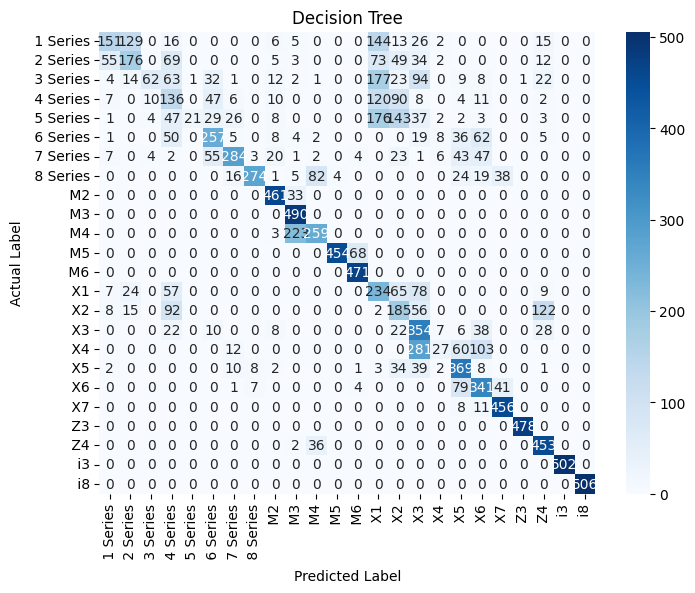

In [12]:
# Visualisasikan Confusion Matrix
print("================ Confusion Matrix ================")
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6)) # Ukuran gambar bisa disesuaikan
sns.heatmap(
    cm,
    annot=True,
    fmt='d', # Format angka sebagai integer
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')
plt.show()

INPUT MANUAL DARI USER

In [14]:
# === PREDIKSI MANUAL (INPUT DARI USER) ===

print("\n=== PREDIKSI MANUAL ===")

# Input data dari user
year = int(input("Masukkan tahun mobil : "))
price = float(input("Masukkan harga mobil (mata uang Inggris (£)): "))
transmission = input("Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): ").strip()
mileage = float(input("Masukkan jarak tempuh (mileage): "))
fuelType = input("Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): ").strip()
tax = float(input("Masukkan pajak kendaraan (tax (mata uang Inggris (£))): "))
mpg = float(input("Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): "))
engineSize = float(input("Masukkan ukuran mesin (engineSize): "))

# Buat DataFrame dari input
input_data = pd.DataFrame([{
    'year': year,
    'price': price,
    'mileage': mileage,
    'tax': tax,
    'mpg': mpg,
    'engineSize': engineSize,
    'transmission': transmission,
    'fuelType': fuelType
}])

# Encode kategori agar sesuai dengan model
input_encoded = pd.get_dummies(input_data, columns=['transmission', 'fuelType'])
input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Normalisasi dengan scaler yang sama
input_scaled = scaler.transform(input_encoded)

# Prediksi
prediction = tree_model.predict(input_scaled)
predicted_label = le.inverse_transform(prediction)[0]

print(f"\n🚗 Prediksi Model Mobil BMW: {predicted_label}")


=== PREDIKSI MANUAL ===
Masukkan tahun mobil : 2019
Masukkan harga mobil (mata uang Inggris (£)): 20000
Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): 1
Masukkan jarak tempuh (mileage): 30000
Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): 2
Masukkan pajak kendaraan (tax (mata uang Inggris (£))): 179
Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): 50.0
Masukkan ukuran mesin (engineSize): 3.0

🚗 Prediksi Model Mobil BMW:  1 Series
